## NimaErshadi

<div style="direction:rtl">
خب، در این بخش به سراغ اولین تسک بخش دیتا ساینس می رویم. برای این بخش ما از دیتاست معروف 911 استفاده می کنیم که لینک آن در پایین قرار داده شده است.

[911-Kaggle](https://www.kaggle.com/mchirico/montcoalert)

<div style="direction:rtl">
4 کتابخانه ی مورد نیازمان را ایمپورت کنید.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<div style="direction:rtl">
دیتاستی که در اختیارتان قرار گرفته را با نام df بخوانید.

In [147]:
df = pd.read_csv('911.csv')

<div style="direction:rtl">
نگاه خلاصه به سطور دیتاست، دریافت اطلاعات کلی و اطلاعات آماری.

In [42]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
lat          99492 non-null float64
lng          99492 non-null float64
desc         99492 non-null object
zip          86637 non-null float64
title        99492 non-null object
timeStamp    99492 non-null object
twp          99449 non-null object
addr         98973 non-null object
e            99492 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [31]:
df.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


<div style="direction:rtl">
پیمانکار قصد دارد که تعدادی ایستگاه خدمات اورژانسی در شهر هایی که در آن ها تقاضا زیاد است تاسیس نماید، به این منظور 5 زیپ کدی که بیشتری تماس را با 911 داشته اند بیابید.

In [39]:
df[(df['zip']== '19401.0')]

,lat,lng,desc,zip,title,timeStamp,twp,addr,e


In [57]:
 df.groupby('zip')['zip'].count().sort_values(ascending=False).head()
# .value_count() هم میتوانستیم استفاده کنیم 

zip
19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

<div style="direction:rtl">
تحلیل بالا را برای 5 شهر پر تقاضا نیز انجام دهید.

In [63]:
 df.groupby('twp')['twp'].count().sort_values(ascending=False).head()

twp
LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

<div style="direction:rtl">
قصد داریم تا ارزیابی روی تعداد خدمات ارائه شده توسط سرویس 911 انجام دهیم، به این منظور تعداد موضوعات یکتایی که در مورد آن تماس حاصل شده را به دست آورید.

In [8]:
df['title'].nunique()


110

<div style="direction:rtl">
در ستون موضوعات، قبل از بیان اصل مشکل، دسته بندی آن نیز مشخص شده است، مانند EMS یا Fire. ستون جدیدی تحت عنوان Reason بسازید و این دسته بندی ها را در آن ذخیره کنید.

In [148]:
df['reason'] = df['title'].apply(lambda x:x.split(':')[0])

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS
...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS


<div style="direction:rtl">
با توجه به ستونی که ساختید، تعداد تماس ها به 911 برای هر کدام از این موضوعات کلی چه مقدار بوده؟

In [8]:
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<div style="direction:rtl">
تحلیل بالا را مصور سازی کنید.

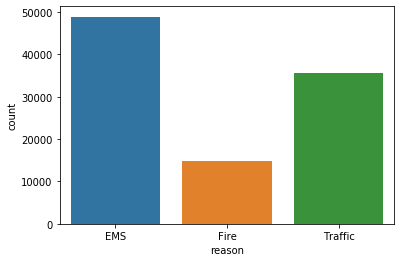

In [9]:
sns.countplot(x = 'reason',data = df )

<Axes: xlabel='Reason', ylabel='count'>

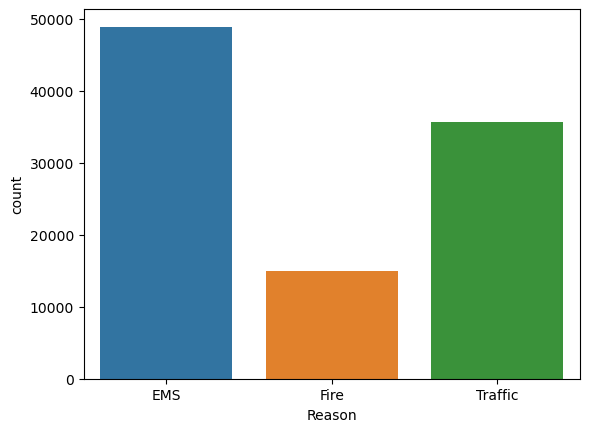

<div style="direction:rtl">
حالا می خواهیم کمی با دیتاهای زمانی سر وکله بزنیم. تایپ یکی از داده های این ستون را نمایش دهید.

In [14]:
type(df['timeStamp'][0])

str

<div style="direction:rtl">
با کمک متد pd.to_datetime این ستون را به تایپ datetime تبدیل کنید.
<div style="direction:rtl">
برای اطلاعات بیشتر می توانید به لینک زیر مراجعه کنید.

[pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)

In [149]:
df["datetime"] = pd.to_datetime(df['timeStamp'])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,datetime
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 17:40:00
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 17:40:01
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 17:40:01


<div style="direction:rtl">
پس از انجام این کار، باز هم تایپ یکی از داده های این ستون را بررسی کنید.

In [19]:
type(df['datetime'][0])

pandas._libs.tslibs.timestamps.Timestamp

<div style="direction:rtl">
حالا که تایپ این ستون را به datetime تبدیل کردیم، می توانیم ویژگی های مختلفی را از آن استخراج کنیم که یک نمونه از آن را در پایین مشاهده می کنید:

In [150]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])


In [170]:
time = df['timeStamp'].iloc[0]
print(str(df['timeStamp'].iloc[0]).split()[0])
print(time.date())
print(time.hour)
print(time.minute)

2015-12-10
2015-12-10
17
40


<div style="direction:rtl">
با تحقیق و جست و جو در این ویژگی ها ، سه ستون Hour, Month, Day of Week را در این دیتافریم بسازید.

In [151]:
df['Hour'] = df['datetime'].apply(lambda x : x.hour)
df['Month'] = df['datetime'].apply(lambda x : x.month)
df['DOF'] = df['datetime'].apply(lambda x : x.dayofweek)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,DOF
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,8,2
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,8,2
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,8,2
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,8,2


<div style="direction:rtl">
دیکشنری زیر را با کمک map رو ستون day of week پیاده نمایید.

In [152]:
df['DOF'] = df['DOF'].apply(lambda x : dmap[x] )
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,datetime,Hour,Month,DOF
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,2015-12-10 17:40:00,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,2015-12-10 17:40:00,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,2015-12-10 17:40:00,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,2015-12-10 17:40:01,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,2015-12-10 17:40:01,17,12,Thu


In [40]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,DOF
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,8,Wed
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,8,Wed
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,8,Wed
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,8,Wed


<div style="direction:rtl">
نمودار کتگوریکال زیر را برای روزهای هفته به تفکیک دلیل ترسیم کنید.
<div style="direction:rtl">
پ.ن: به محل legend دقت کنید و برای قرار دادن آن در آن محل از ویژگیbbox_to_anchor کمک بگیرید.

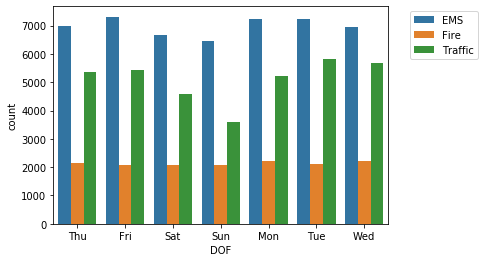

In [66]:
sns.countplot(x = 'DOF',hue= 'reason',data = df )
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

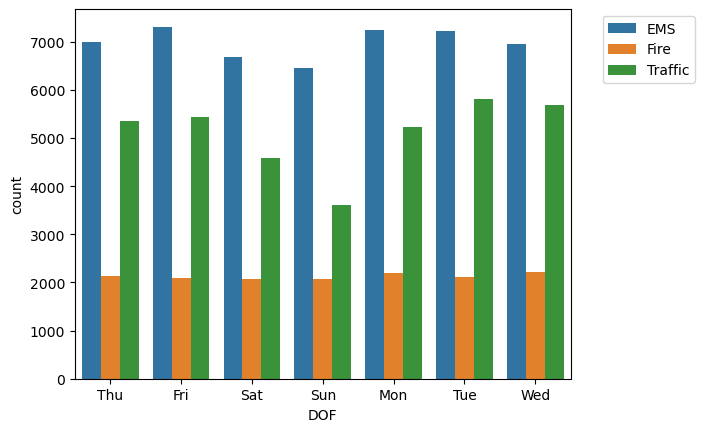

<div style="direction:rtl">
تحلیل بالا را برای ماه ها نیز انجام دهید.

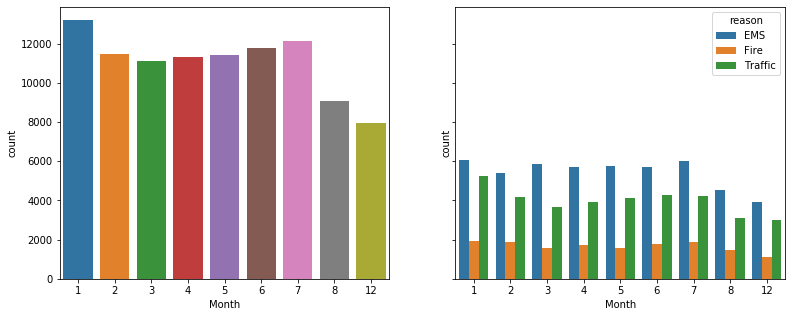

In [87]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5), sharey=True)
#شمردن به صورت کلی (یعنی بدون در نظر گرفتن دلیل)
ax[0] = sns.countplot(ax=ax[0],x = 'Month',data = df )
#شمردن جزئی (یعنی دلایل را جدا جدا در نظر گرفنه و بررسی میکنیم)
ax[1] = sns.countplot(ax=ax[1],x = 'Month',hue= 'reason',data = df )
#در صورت تمایل کد زیر راهنما را بیرون کادر قرار میدهد
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

<Axes: xlabel='Month', ylabel='count'>

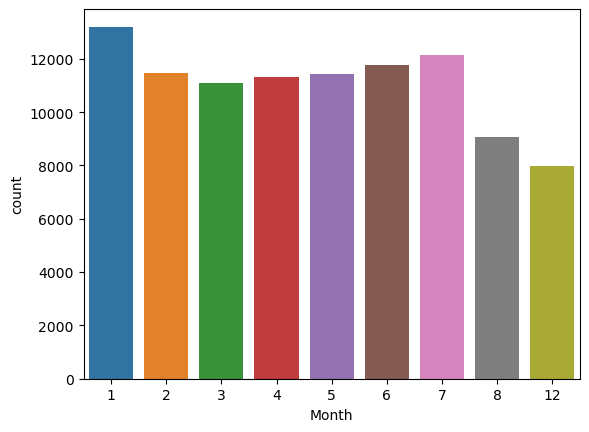

<div style="direction:rtl">
چه ناهنجاری را در پلات بالا مشاهده می کنید؟

<div style="direction:rtl">
مشاهده می شود که ....         اومدم بنویسم دیدم زیرش نوشتید

<div style="direction:rtl">
بله درست است، مشاهده می کنیم که داده های تعدادی از ماه ها موجود نیست. خب راه حل چیست؟ احتمالا باید دورن یابی کنیم. برای این منظور دیتاستی را با ایندکس های ماه ها تشکیل دهید که در آن تعداد یکی از ستون ها به دلخواه به نمایش گذاشته شده باشد و نام آن را byMonth می گذاریم.

In [153]:
byMonth = df.groupby(['Month']).agg({'reason':'count'})
byMonth

,reason
Month,
1,13205
2,11467
3,11101
4,11326
5,11423
6,11786
7,12137
8,9078
12,7969


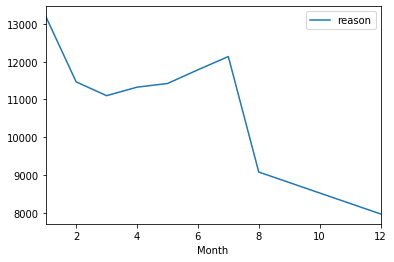

In [97]:
byMonth.plot()

<div style="direction:rtl">
حالا برای این دیتاست یک .plot() ساده انجام می دهیم تا بر اساس ایندکس های دیتاست، درون یابی انجام شود.
<div style="direction:rtl">
توجه داشته باشید که پلات دیفالت پانداز، پلات خطی است، یعتی به عبارتی : 
<div style="direction:ltr">    
    .plot() = .plot.line()

<div style="direction:rtl">
حالا سعی کنید به همان داده های بالا با ابزار های مصورسازی رگرسیون، یک خط فیت کنید و این روند را از حالت غیر خطی به خطی نمایش دهید.

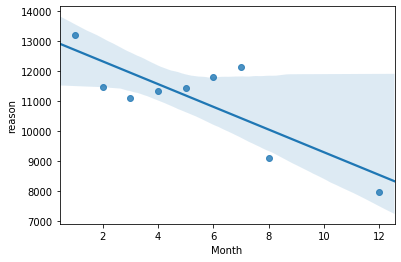

In [127]:
sns.regplot(x="Month", y="reason", data=byMonth.reset_index());
#
#sns.lmplot(x="Month", y="reason", data= byMonth.reset_index());

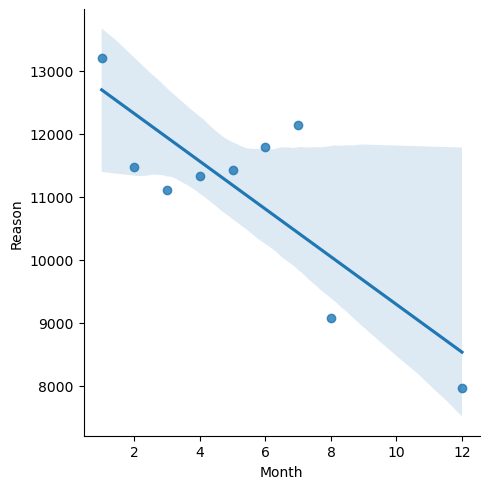

<div style="direction:rtl">
حالا ویژگی Date را از ستون تاریخ استخراج کنید و آن را در یک ستون مجزا ذخیره کنید و تعداد تماس ها را بر اساس تاریخ پلات خطی کنید.

In [189]:
#df['date'] = pd.to_datetime(df['timeStamp'].apply(lambda x: str(x).split()[0]))
#
df['date'] = df['timeStamp'].apply(lambda x: x.date())

In [190]:
type(df['date'][0])

datetime.date

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,DOF,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99487,40.132869,-75.333515,MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...,19401.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:06:00,NORRISTOWN,MARKLEY ST & W LOGAN ST,1,Traffic,11,8,Wed,2016-08-24
99488,40.006974,-75.289080,LANCASTER AVE & RITTENHOUSE PL; LOWER MERION; ...,19003.0,Traffic: VEHICLE ACCIDENT -,2016-08-24 11:07:02,LOWER MERION,LANCASTER AVE & RITTENHOUSE PL,1,Traffic,11,8,Wed,2016-08-24
99489,40.115429,-75.334679,CHESTNUT ST & WALNUT ST; NORRISTOWN; Station ...,19401.0,EMS: FALL VICTIM,2016-08-24 11:12:00,NORRISTOWN,CHESTNUT ST & WALNUT ST,1,EMS,11,8,Wed,2016-08-24
99490,40.186431,-75.192555,WELSH RD & WEBSTER LN; HORSHAM; Station 352; ...,19002.0,EMS: NAUSEA/VOMITING,2016-08-24 11:17:01,HORSHAM,WELSH RD & WEBSTER LN,1,EMS,11,8,Wed,2016-08-24


In [191]:
bydate = df.groupby(['date']).agg({'reason':'count'})

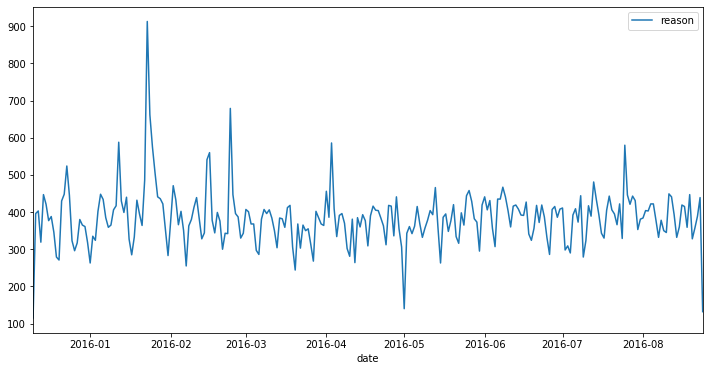

In [194]:
bydate.plot(figsize= (12,6))
#
#another way ----------> df['date'].value_counts().plot() 

<div style="direction:rtl">
با کمک کوئری زدن، پلات بالا را به تفکیک دلایل مختلف ترسیم نمایید و برای هر پلات هم تایتل بزنید.

## Traffic

In [199]:
bydate_Traffic = df[df['reason']=='Traffic'].groupby(['date']).agg({'reason':'count'})

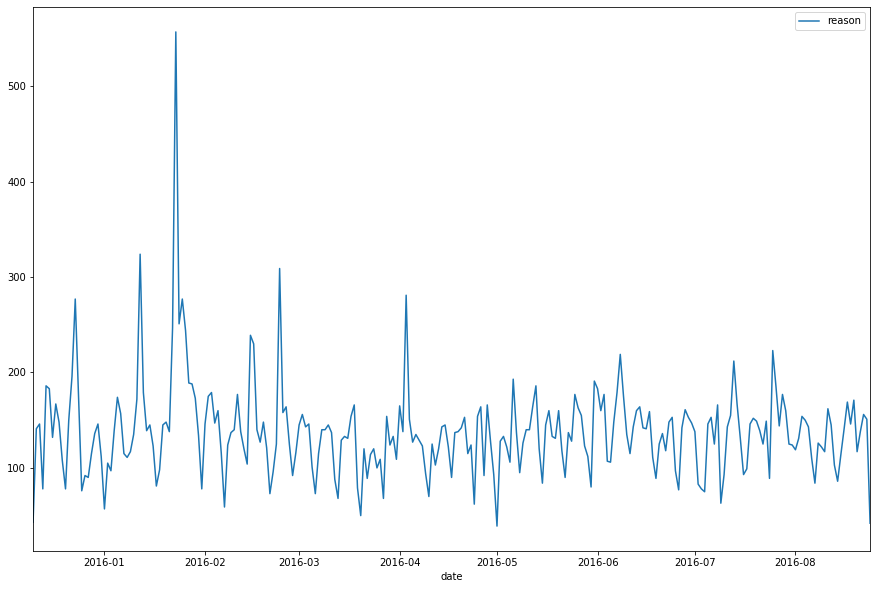

In [200]:
bydate_Traffic.plot(figsize= (15,10))

Text(0.5, 1.0, 'Traffic')

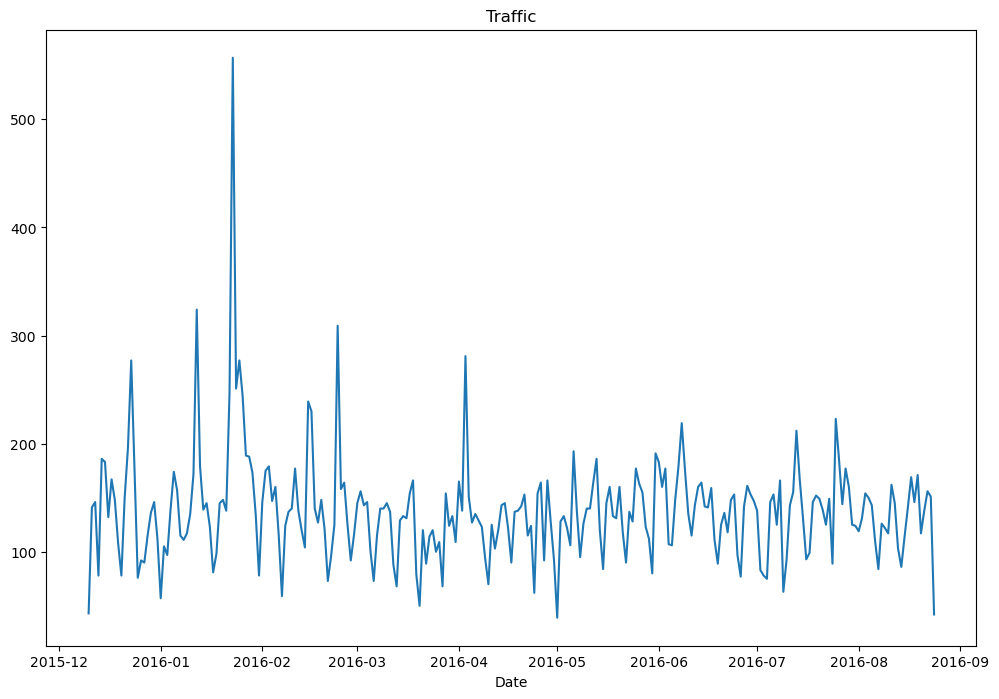

## Fire

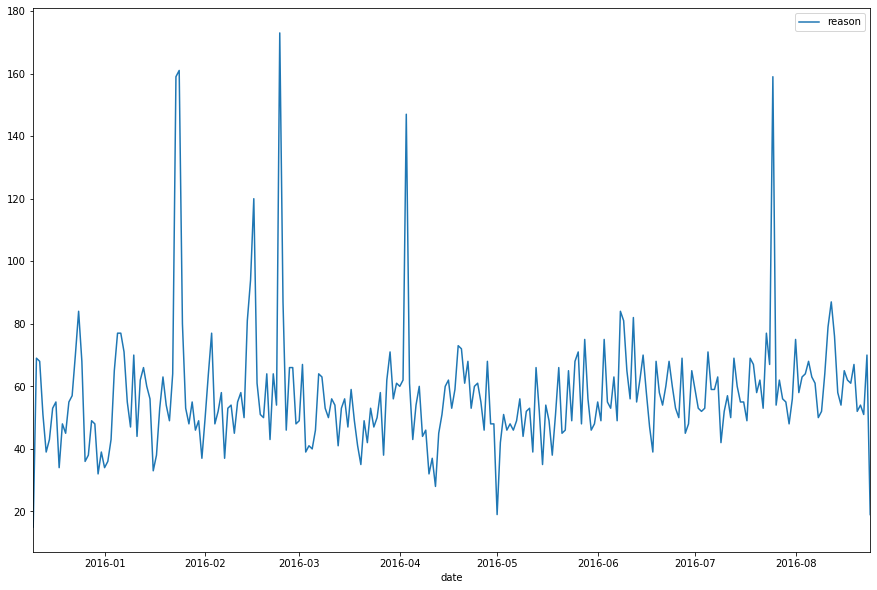

In [201]:
bydate_Fire = df[df['reason']=='Fire'].groupby(['date']).agg({'reason':'count'})
bydate_Fire.plot(figsize= (15,10))

Text(0.5, 1.0, 'Fire')

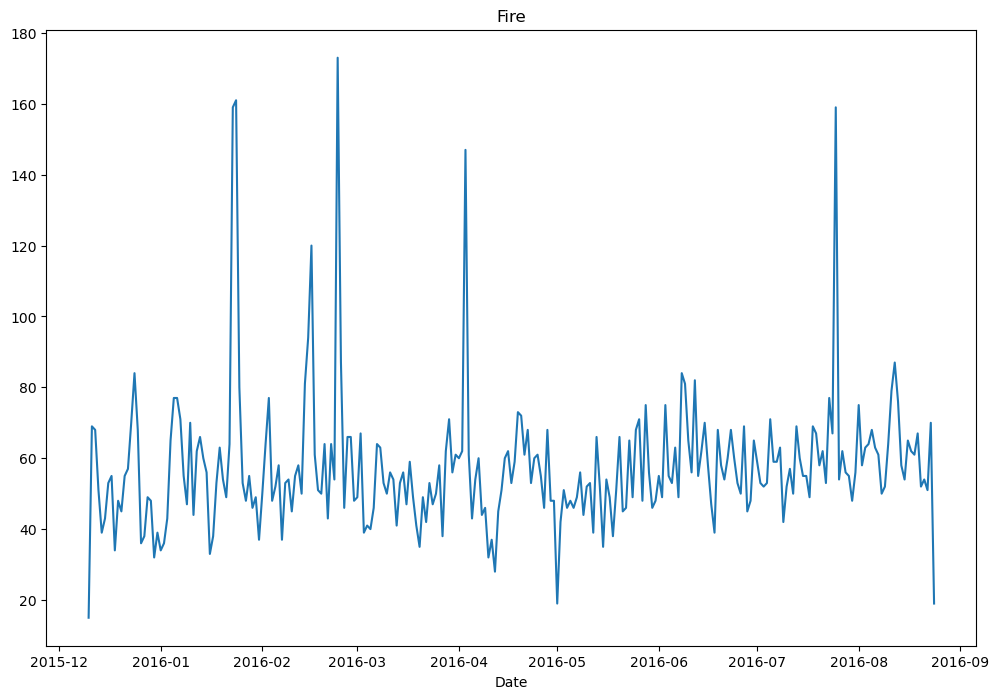

## EMS

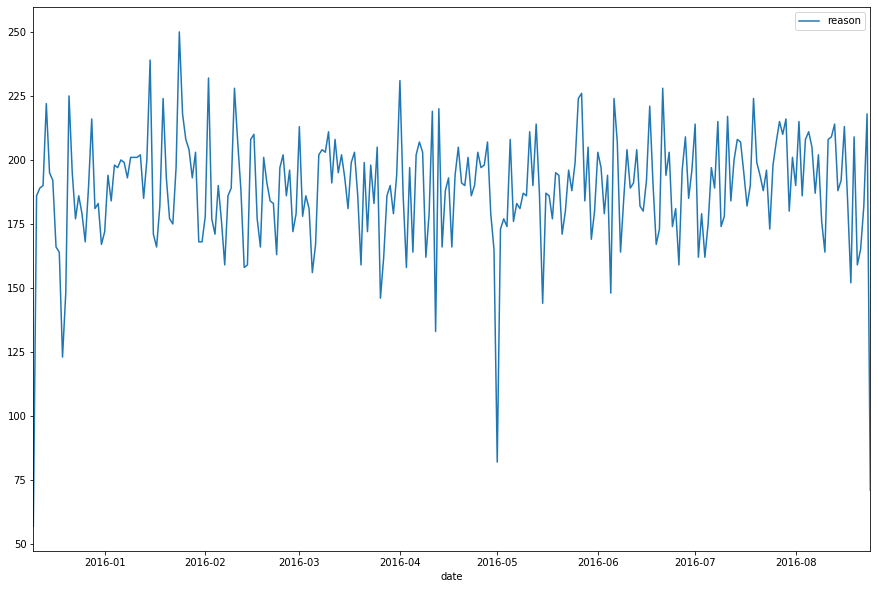

In [202]:
bydate_EMS = df[df['reason']=='EMS'].groupby(['date']).agg({'reason':'count'})
bydate_EMS.plot(figsize= (15,10))

Text(0.5, 1.0, 'EMS')

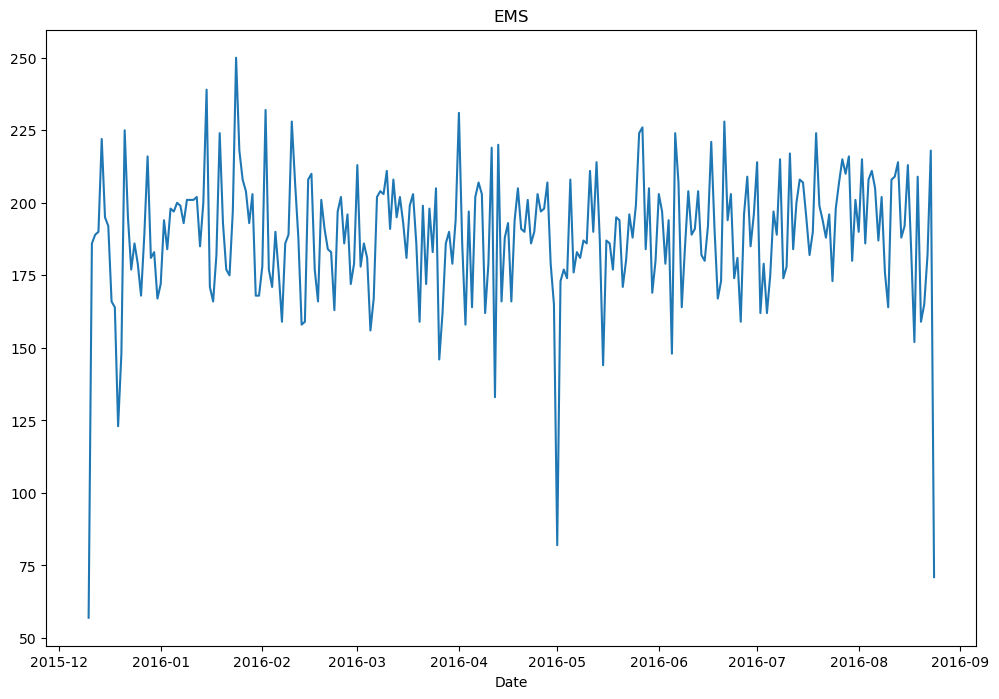

<div style="direction:rtl">
با مراجعه به لینک زیر، کمی راجع به متد unstack تحقیق نمایید.

[unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html)

<div style="direction:rtl">
همان طور که احتمالا مطالعه نمودید، کار این متد این است که در ایندکس های سلسه مراتبی، یک لایه را به ستون تبدیل نماید.
موارد استفاده ی این متد وقتیست که به دلایلی گروپ بای چند لایه کردید و میخواهید یک لایه را در ستون نمایش دهید.     
با استفاده از این متد جدول پایین را تشکیل دهید و نام آن را dayHour قرار دهید.
<div style="direction:rtl">
پ.ن: مقادیر درون جدول نمایانگر تعداد می باشد.

In [210]:
df.groupby(['DOF' , 'Hour']).count().unstack()

lat                                               ... date             \
Hour   0    1    2    3    4    5    6    7    8    9   ...   14   15    16   
DOF                                                     ...                   
Fri   275  235  191  175  201  194  372  598  742  752  ...  932  980  1039   
Mon   282  221  201  194  204  267  397  653  819  786  ...  869  913   989   
Sat   375  301  263  260  224  231  257  391  459  640  ...  789  796   848   
Sun   383  306  286  268  242  240  300  402  483  620  ...  684  691   663   
Thu   278  202  233  159  182  203  362  570  777  828  ...  876  969   935   
Tue   269  240  186  170  209  239  415  655  889  880  ...  943  938  1026   
Wed   250  216  189  209  156  255  410  701  875  808  ...  904  867   990   

                                          
Hour    17   18   19   20   21   22   23  
DOF                                       
Fri    980  820  696  667  559  514  474  
Mon    997  885  746  613  497  472  325  
Sat    757  778  696  628  572  506  467  
Sun    714  670  655  537  461  415  330  
Thu   1013  810  698  617  553  424  354  
Tue   1019  905  731  647  571  462  274  
Wed   1037  894  686  668  575  490  335  

[7 rows x 312 columns]

<div style="direction:rtl">
حالا همین جدول بالا را با کمک pivot_table تشکیل دهید.

In [223]:
#اگر میخواهید همه را ببینید ,margins=True قرار دهید
heat = pd.pivot_table(df,columns='Hour',index='DOF',aggfunc='count',values= 'reason')
heat

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DOF,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


<div style="direction:rtl">
حالا هیت مپ را برای جدول بالا ترسیم نمایید.

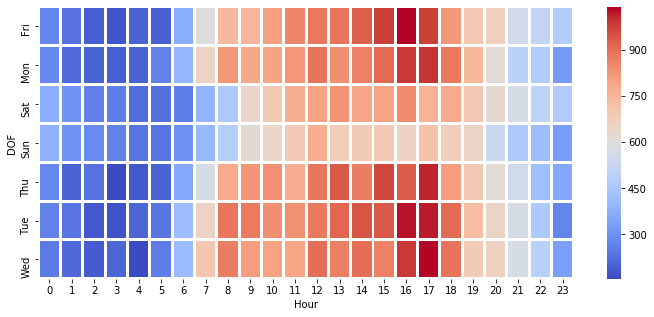

In [228]:
plt.figure(figsize= (12,5))
sns.heatmap(heat,lw = 2 ,cmap= "coolwarm")

<Axes: xlabel='Hour', ylabel='DOF'>

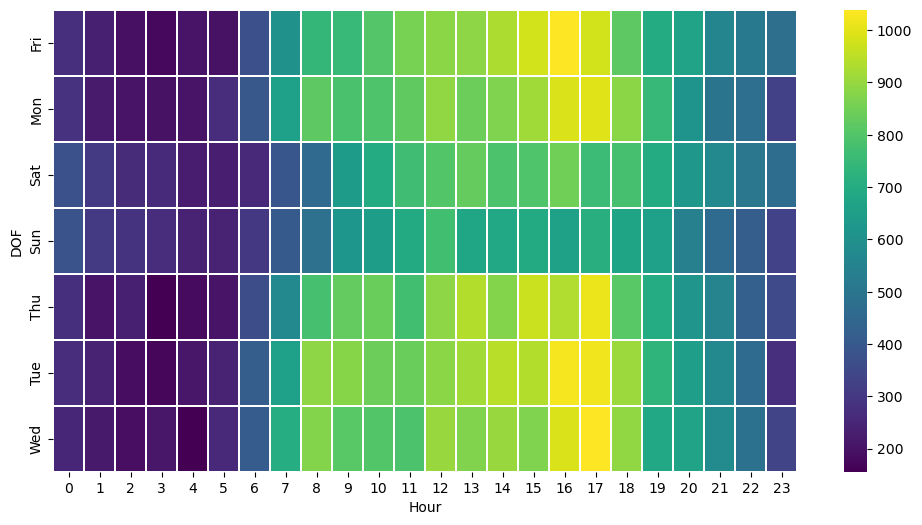

<div style="direction:rtl">
همان جدول بالا را با دو روش برای ماه هم ترسیم نمایید و همان پلات را ترسیم نمایید.

In [236]:
df.groupby(['DOF' , 'Month']).count()['reason'].unstack()

Month,1,2,3,4,5,6,7,8,12
DOF,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


In [229]:
#اگر میخواهید همه را ببینید ,margins=True قرار دهید
heatMonth = pd.pivot_table(df,columns='Month',index='DOF',aggfunc='count',values= 'reason')
heatMonth

Month,1,2,3,4,5,6,7,8,12
DOF,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


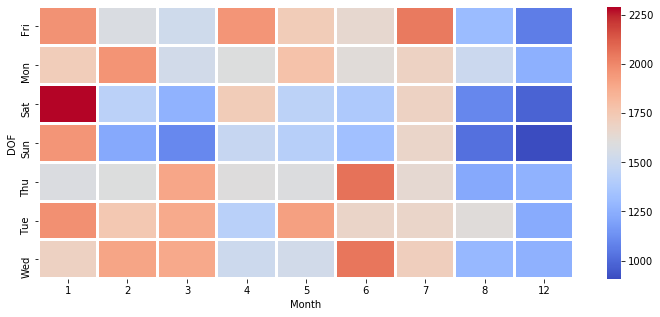

In [230]:
plt.figure(figsize= (12,5))
sns.heatmap(heatMonth,lw = 2 ,cmap= "coolwarm")

<Axes: xlabel='Month', ylabel='DOF'>

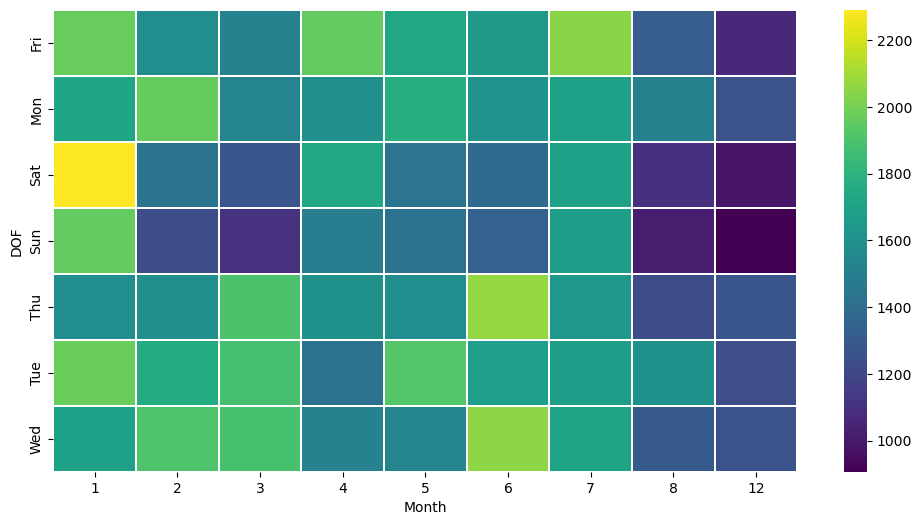

<div style="direction:rtl">

## خسته که نشدید؟ تازه شروع شده :)